### 基礎理論:
* Selenium原為網頁測試工具，但由於可以直接以程式碼操控瀏覽器的特性，使其成為網路爬蟲必備的工具之一
* 啟用selenium之後，你指定的瀏覽器就會開啟，並依照你所編寫的指令依序執行，所有網頁的操作
* 由於是真正的瀏覽器在運作，絕大多數的網站都可以輕鬆的突破，但也因此導致運行速度極慢、占用較高的電腦效能
* 一般還是會先嘗試使用requests獲取網頁原始碼，但如果實在無法突破對方網站伺服器的阻隔時，就可以改用selenium試試看
* tip:使用selenium進行每個動作後，記得要經常加入time.sleep，等候瀏覽器完全地將資訊讀取進來，再來定位元素、進行互動，否則會出現類似下面這種錯誤

* find_element_by_id
* find_element_by_name
* find_element_by_xpath
* find_element_by_link_text
* find_element_by_partial_link_text
* find_element_by_tag_name
* find_element_by_class_name
* find_element_by_css_selector
> elements:找到全部元素 ex:find_elements_by_name

In [11]:
from selenium import webdriver
import time
#啟動selenium 環境
driver = webdriver.Chrome()
#前往該網址
driver.get("https://www.google.com/")
time.sleep(2) #暫停整個流程2秒鐘，給予整個抓取等候時間
#find query tag
search_input = driver.find_element_by_name("q")
search_input.send_keys('python is awesome')
time.sleep(2)
start_search_btn = driver.find_element_by_name("btnK")
start_search_btn.click()
time.sleep(2)
htmltext = driver.page_source
driver.close()

'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="zh-TW"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>python is awesome - Google 搜尋</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.Sj5LKyeUKoE.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/rs=AHpOoo9ToCtoaz0mr9IKXAop6Eq9AIpSlw/cb=gapi.loaded_0" nonce="bRkBSKJfBZCw/4+xIXsKfg==" async=""></script><script nonce="bRkBSKJfBZCw/4+xIXsKfg==">(function(){window.google={kEI:\'X0QkXsrmMoWImAWhmoDQCw\',kEXPI:\'31\',authuser:0,kGL:\'TW\',kBL:\'H9fM\'};google.sn=\'web\';google.kHL=\'zh-TW\';google.jsfs=\'Ffpdje\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;r
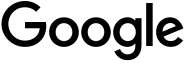
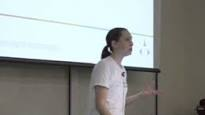
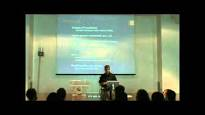
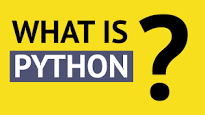
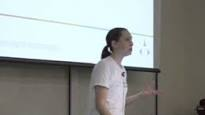
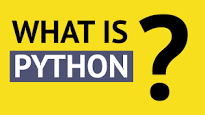

In [9]:
htmltext

In [19]:
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("http://taqm.epa.gov.tw/taqm/tw/MonthlyAverage.aspx")
selectSite = Select(browser.find_element_by_id("ctl05_ddlSite"))
selectSite.select_by_value('29')
selectYear = Select(browser.find_element_by_id("ctl05_ddlYear"))
selectYear.select_by_value('2014')
browser.find_element_by_id('ctl05_btnQuery').click()
time.sleep(2)
html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')
table = soup.find('table',class_ = 'TABLE_G')
browser.close()
print(table)

<table align="Center" border="1" cellpadding="3" cellspacing="0" class="TABLE_G" id="ctl05_gv" rules="all" style="border-color:Black;border-width:1px;border-style:None;border-collapse:collapse;">
<tbody><tr style="color:Black;font-weight:normal;">
<th scope="col">監測項目</th><th scope="col">單位</th><th scope="col">監測日期</th><th scope="col">監測值</th><th scope="col">標註</th>
</tr><tr style="color:Black;">
<td class="no-alt" rowspan="12" style="white-space:nowrap;" valign="top">SO2</td><td class="no-alt" rowspan="12" valign="top">ppb</td><td>2014/01</td><td>4.20</td><td> </td>
</tr><tr class="ALT" style="color:Black;">
<td>2014/02</td><td>2.50</td><td> </td>
</tr><tr style="color:Black;">
<td>2014/03</td><td>3.80</td><td> </td>
</tr><tr class="ALT" style="color:Black;">
<td>2014/04</td><td>3.40</td><td> </td>
</tr><tr style="color:Black;">
<td>2014/05</td><td>3.10</td><td> </td>
</tr><tr class="ALT" style="color:Black;">
<td>2014/06</td><td>3</td><td> </td>
</tr><tr style="color:Black;">
<td>201

In [44]:
#<td class="no-alt" rowspan="12" style="white-space:nowrap;" valign="top">SO2</td>
#<td class="no-alt" rowspan="12" valign="top">ppb</td><td>2014/01</td><td>4.20</td>
list_inspect = list()
i = 0
list_inspect.append(list())
for item in table.find_all('th'):
    list_inspect[0].append(item.text)
for item in table.find_all('td'):
    if item.get('style'):
        i += 1
        list_inspect.append(list())
        list_inspect[i].append(item.text)
        list_inspect[i].append(list())
    else:
        list_inspect[i][1].append(item.text.re)
print(list_inspect)        
    


[['監測項目', '單位', '監測日期', '監測值', '標註'], ['SO2', ['ppb', '2014/01', '4.20', '\xa0', '2014/02', '2.50', '\xa0', '2014/03', '3.80', '\xa0', '2014/04', '3.40', '\xa0', '2014/05', '3.10', '\xa0', '2014/06', '3', '\xa0', '2014/07', '3.70', '\xa0', '2014/08', '3.40', '\xa0', '2014/09', '3.70', '\xa0', '2014/10', '2.80', '\xa0', '2014/11', '2.70', '\xa0', '2014/12', '3.10', '\xa0']], ['CO', ['ppm', '2014/01', '0.48', '\xa0', '2014/02', '0.38', '\xa0', '2014/03', '0.47', '\xa0', '2014/04', '0.39', '\xa0', '2014/05', '0.35', '\xa0', '2014/06', '0.27', '\xa0', '2014/07', '0.22', '\xa0', '2014/08', '0.23', '\xa0', '2014/09', '0.31', '\xa0', '2014/10', '0.35', '\xa0', '2014/11', '0.41', '\xa0', '2014/12', '0.42', '\xa0']], ['O3', ['ppb', '2014/01', '30.70', '\xa0', '2014/02', '31.90', '\xa0', '2014/03', '35.10', '\xa0', '2014/04', '41.50', '\xa0', '2014/05', '26.80', '\xa0', '2014/06', '23.50', '\xa0', '2014/07', '24.30', '\xa0', '2014/08', '24.70', '\xa0', '2014/09', '27.60', '\xa0', '2014/10', '43.

In [38]:
list_test = list()
list_test.append('l')
list_test.append(list())
print(list_test)

['l', []]
